In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import ast
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [5]:
artists = pd.read_csv('data_by_artist.csv')
years = pd.read_csv('data_by_year.csv')
artists = artists.drop_duplicates(subset='artist_name', keep='last')
full = pd.read_csv('full_music_data.csv')
influence = pd.read_csv('influence_data.csv')

In [6]:
#remove songs by artists that arent in the artists table
#duplicate songs w/ more than one artist
#takes my computer about a minute to run
#can ignore the warnings about setting a copy of a slice from a dataframe
allArtists = list(artists['artist_id'])
newdict = {}

full['artists_id'] = [int(x.split(',')[0][1:-1]) if len(x.split(',')) == 1 else [int(y) for y in x[1:-1].split(',')] for x in list(full['artists_id'])]
full['artist_names'] = [ast.literal_eval(x) if len(ast.literal_eval(x)) > 1 else ast.literal_eval(x)[0] for x in full['artist_names']]
floor = min(full['tempo'])
span = max(full['tempo']) - floor
full['tempo'] = [(x-floor)/span for x in full['tempo']]

last_id = 0
row = 0
for i in tqdm(range(len(full))): 
    thisRow = full.iloc[i,:]
    artIDs = thisRow['artists_id']
    artNames = thisRow['artist_names']
    
    if type(artIDs) == int:
        if artIDs == last_id: 
            thisRow['artists_id'] = artIDs
            thisRow['artist_names'] = artNames
            newdict[row] = thisRow.to_dict()
            row+=1
            last_id = artIDs
        else:
            if artIDs in allArtists:
                thisRow['artists_id'] = artIDs
                thisRow['artist_names'] = artNames
                newdict[row] = thisRow.to_dict()
                row+=1
                last_id = artIDs
                
    else:
        for j in range(len(artIDs)):
            artID = int(artIDs[j])
            artName = str(artNames[j])
            
            if artID in allArtists:
                thisRow['artists_id'] = artID
                thisRow['artist_names'] = artName
                newdict[row] = thisRow.to_dict()
                row+=1
    i+=1

full = pd.DataFrame.from_dict(newdict,'index')

artistGenres = {} #adds song genre to full
for i in tqdm(range(len(influence))):
    row = influence.iloc[i]
    influencer = row['influencer_id']
    follower = row['follower_id']
    infGenre = row['influencer_main_genre']
    folGenre = row['follower_main_genre']
    artistGenres[influencer] = infGenre
    artistGenres[follower] = folGenre

def getGenre(row):
    artist = row['artists_id']
    if type(artist) == list:
        print(row)
    try:
        genre = artistGenres[artist]
    except KeyError:
        genre = 'N/A'
    return genre

full['genre'] = full.apply(lambda row: getGenre(row), axis = 1)
full


  0%|                                                                                        | 0/98340 [00:00<?, ?it/s]C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre
0,Fat Freddy's Drop,178301,0.600,0.365,0.131,0.532777,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic
1,Fat Freddy's Drop,178301,0.874,0.326,0.179,0.490063,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic
2,Fat Freddy's Drop,178301,0.670,0.531,0.336,0.571037,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic
3,Alexander O'Neal,625201,0.761,0.702,0.850,0.429237,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;
4,Alexander O'Neal,625201,0.661,0.828,0.902,0.471455,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102913,ZZ Top,690254,0.276,0.892,0.715,0.329693,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster,Pop/Rock
102914,ZZ Top,690254,0.700,0.592,0.906,0.450025,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love,Pop/Rock
102915,ZZ Top,690254,0.709,0.709,0.863,0.456977,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese,Pop/Rock
102916,ZZ Top,690254,0.552,0.651,0.533,0.661835,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster,Pop/Rock


In [11]:
idDict = {}
for i in range(len(artists)):
    try:
        idDict[artists['artist_id'][i]] = artists['artist_name'][i]
    except KeyError:
        pass

influence = pd.read_csv('influence_data.csv')
iGraph = nx.DiGraph()
for artist in artists['artist_id']:
    iGraph.add_node(artist, weight = 0)
    
for i in range(len(influence)):
    influencer = influence["influencer_id"][i]
    follower = influence['follower_id'][i]
    
    iGraph.add_edge(influencer,follower)    

arts = []
artnames = []
scores = []
for node in iGraph.nodes():
    children = list(iGraph.successors(node))
    total = 0
    for child in children:
        total += iGraph.out_degree[child]
        
    iGraph.nodes[node]['weight'] = total
    arts.append(node)
    try:
        artnames.append(idDict[node])
    except KeyError:
        artnames.append('Unknown')
    scores.append(total)
    
   
totalInfluence = pd.DataFrame({'names':artnames, 'artists':arts, 'scores':scores})
totalInfluence = totalInfluence.sort_values(by=['scores'], ascending = False)
totalInfluence = totalInfluence.reset_index(drop=True)
totalInfluence[:10]

,names,artists,scores
0,The Beatles,754032,11237
1,Bob Dylan,66915,7928
2,The Rolling Stones,894465,6341
3,Chuck Berry,120521,5897
4,Elvis Presley,180228,4749
5,The Velvet Underground,840402,4380
6,Little Richard,824022,4371
7,Jimi Hendrix,354105,4312
8,Hank Williams,549797,4134
9,The Kinks,100160,4067


In [12]:
genreCount = full.groupby('genre').count().iloc[:,1]
genreCount = genreCount[genreCount > 1000].sort_values(ascending = False)

artistStyle = full.groupby(['artist_names']).mean() #some values dont make sense to average but w/e
songStats = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness']        

since60 = full[full['year'] >= 1960]
genreStyles = full.groupby(['genre']).mean()
genres = list(genreCount.index)
since60 = since60[since60['genre'].isin(genres)]
since60 = since60.groupby(['year','genre']).mean()
since60.loc[1960].loc['Blues']

newDict = {}
for year in tqdm(range(1960,2020)):
    for genre in genres:
        allInGenre = full[full['genre'] == genre]
        rollingAvg = allInGenre[allInGenre['year'] <= year+2]
        rollingAvg = rollingAvg[rollingAvg['year'] >= year-2]
        rollingAvg = rollingAvg.mean()[songStats].to_dict()
        newDict[str(year)+genre] = rollingAvg
newdf = pd.DataFrame.from_dict(newDict, orient = 'index')
newdf

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:15<00:00,  3.88it/s]


,danceability,energy,valence,tempo,acousticness,instrumentalness,speechiness
1960Pop/Rock,0.535358,0.489946,0.678651,0.477926,0.670648,0.073234,0.053703
1960R&B;,0.516806,0.449322,0.648734,0.484936,0.702474,0.026630,0.051043
1960Country,0.590282,0.417505,0.694578,0.477073,0.713350,0.052295,0.053156
1960Jazz,0.503312,0.282117,0.451191,0.455377,0.753262,0.340393,0.054833
1960Vocal,0.429970,0.248538,0.396518,0.451265,0.800083,0.013699,0.056298
...,...,...,...,...,...,...,...
2019Electronic,0.657600,0.688147,0.446659,0.473650,0.179765,0.036758,0.088609
2019International,0.478000,0.704000,0.228000,0.614128,0.016000,0.000000,0.047100
2019Folk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019Blues,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
genre = []
for i in influence['influencer_main_genre']:
    if i not in genre:
        genre.append(i)
for i in influence['follower_main_genre']:
    if i not in genre:
        genre.append(i)
genre

['Pop/Rock',
 'Electronic',
 'Reggae',
 'Jazz',
 'Country',
 'Comedy/Spoken',
 'R&B;',
 'Classical',
 'Latin',
 'Vocal',
 'Folk',
 'Easy Listening',
 'International',
 'Avant-Garde',
 'Blues',
 'Stage & Screen',
 'New Age',
 'Religious',
 "Children's",
 'Unknown']

In [137]:
artistByGenre = {}
for i in genre:
    artistByGenre[i] = []
i = 0
while i < len(influence):
    genreList = artistByGenre.get(influence['influencer_main_genre'][i])
    genreListF = artistByGenre.get(influence['follower_main_genre'][i])
    if influence['influencer_name'][i] not in genreList:
        genreList.append(influence['influencer_name'][i])
    if influence['follower_name'][i] not in genreListF:
        genreListF.append(influence['follower_name'][i])
    i += 1

In [179]:
jazzSongs = full[full['artist_names'].isin(artistByGenre.get('Jazz'))]
jazzSongs = jazzSongs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
jazzMeans = jazzSongs.mean(axis=0)
jazzMeans = jazzMeans.to_numpy()

In [155]:
genreFeatures = []
for i in genre:
    songs = full[full['artist_names'].isin(artistByGenre.get(i))]
    songs = songs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
    means = songs.mean(axis=0)
    means = means.to_numpy()
    genreFeatures.append(means)

In [171]:
i = 0
jazzsim = []
while i < len(genre):
    sim = cosine_similarity(jazzMeans.reshape(1, -1), genreFeatures[i].reshape(1, -1))
    jazzsim.append(sim[0][0])
    i += 1

In [173]:
d = {'Genre' : genre, 'Cosine Similarity' : jazzsim}
jazzSimilarity = pd.DataFrame(data=d)
jazzSimilarity = jazzSimilarity.sort_values(by=['Cosine Similarity'], ascending = False)
jazzSimilarity = jazzSimilarity.reset_index(drop=True)
jazzSimilarity

,Genre,Cosine Similarity
0,Jazz,1.000000
1,Avant-Garde,0.999892
2,Easy Listening,0.999821
3,Folk,0.999606
4,Stage & Screen,0.998424
5,Vocal,0.998347
6,Comedy/Spoken,0.997561
7,Classical,0.996964
8,New Age,0.996319
9,International,0.995279


In [202]:
for i in genre:
    songs = full[full['artist_names'].isin(artistByGenre.get(i))]
    songs = songs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
    means = songs.mean(axis=0)
    print(i)
    print(means['tempo'])

Pop/Rock
0.5041980713608971
Electronic
0.49042630707112583
Reggae
0.4774755289800211
Jazz
0.462278082020503
Country
0.4900360207138811
Comedy/Spoken
0.43481045095581794
R&B;
0.47720687330073297
Classical
0.4364707118746228
Latin
0.4904744919256894
Vocal
0.4515249429416114
Folk
0.4755359158889776
Easy Listening
0.4548916454260138
International
0.4750882932243574
Avant-Garde
0.45780935105224024
Blues
0.4824690364704632
Stage & Screen
0.4256400818155745
New Age
0.4554467713904153
Religious
0.4926720395705324
Children's
0.4874728923340553
Unknown
0.49486651100803203


In [182]:
RBSongs = full[full['artist_names'].isin(artistByGenre.get('R&B;'))]
RBSongs = RBSongs.sort_values(by='year')
RBSongs = RBSongs.reset_index(drop=True)
RBSongs

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,Aretha Franklin,927555,0.496,0.829,0.733,0.487597,-8.876,0,5,0.6290,0.076800,0.162,0.0519,0,161893,0,1927,1927,Evil **** ***** - Live
1,Screamin' Jay Hawkins,309458,0.845,0.455,0.896,0.356433,-13.668,0,5,0.7100,0.420000,0.055,0.0488,0,145933,2,1927,1927,I Put A Spell On You - Live
2,Chuck Willis,126144,0.556,0.476,0.730,0.700698,-6.766,1,10,0.9590,0.002400,0.242,0.0778,0,132733,0,1932,1932,Take It Like A Man (with The Royals)
3,Aretha Franklin,927555,0.648,0.356,0.529,0.355339,-13.917,0,7,0.8960,0.000036,0.110,0.0837,0,186160,3,1936,1936,It Ain't Necessarily So - from ***** and Bess
4,Babyface,61226,0.400,0.408,0.143,0.567764,-8.039,0,0,0.7710,0.013000,0.114,0.0286,0,287853,2,1941,1941,Strange Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,Ashanti,933898,0.768,0.635,0.640,0.659557,-4.925,1,10,0.0289,0.000000,0.312,0.1500,1,215053,71,2020,4/17/2020,NASTY (feat. Ashanti & Megan Thee Stallion)
10955,Kehlani,3226468,0.824,0.503,0.784,0.448181,-6.940,0,6,0.0500,0.000053,0.107,0.1560,0,185419,67,2020,1/28/2020,Get Me
10956,Kehlani,3226468,0.832,0.508,0.750,0.447997,-6.913,0,6,0.0492,0.000054,0.107,0.1490,0,185427,71,2020,2/14/2020,Get Me (feat. Kehlani)
10957,The Weeknd,2674162,0.689,0.374,0.321,0.622637,-10.038,0,5,0.1150,0.000132,0.111,0.0851,1,144540,74,2020,4/3/2020,Missed You - Bonus Track


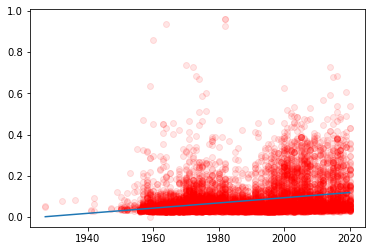

In [430]:
year = RBSongs['year']
loudness = RBSongs['speechiness']
plt.plot(year, loudness, 'ro', alpha=0.1)
plt.plot(np.unique(year), np.poly1d(np.polyfit(year, loudness, 1))(np.unique(year)))

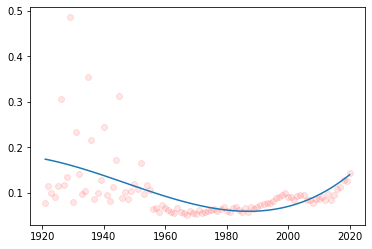

In [433]:
year = years['year']
attribute = years['speechiness']
plt.plot(year, attribute, 'ro', alpha=0.1)
plt.plot(np.unique(year), np.poly1d(np.polyfit(year, attribute, 3))(np.unique(year)))

In [223]:
AGRoots = influence[['influencer_name', 'follower_main_genre']]
AGRoots = AGRoots[AGRoots['follower_main_genre'] == 'Avant-Garde']
AGRoots = pd.DataFrame(AGroots['influencer_name'].value_counts(ascending=False))
AGRoots = AGRoots.reset_index()
AGRoots = AGRoots.rename(columns={'index': 'Influencer', 'influencer_name': 'Number of AG Followers'})
AGRoots

,Influencer,Number of AG Followers
0,John Cage,6
1,Terry Riley,3
2,Philip Glass,2
3,Moondog,2
4,Brian Eno,2
5,Harold Budd,1
6,Maria Callas,1
7,Funkadelic,1
8,John Cale,1
9,Giorgio Moroder,1


In [225]:
ELroots = influence[['influencer_name', 'follower_main_genre']]
ELroots = ELroots[ELroots['follower_main_genre'] == 'Easy Listening']
ELroots = pd.DataFrame(ELroots['influencer_name'].value_counts(ascending=False))
ELroots = ELroots.reset_index()
ELroots = ELroots.rename(columns={'index': 'Influencer', 'influencer_name': 'Number of EL Followers'})
ELroots

,Influencer,Number of EL Followers
0,Les Baxter,4
1,Liberace,3
2,Martin Denny,3
3,AntÃ´nio Carlos Jobim,2
4,Percy Faith,2
5,George Shearing,2
6,Paul Weston,1
7,Melissa Etheridge,1
8,Billy Joel,1
9,Mannheim Steamroller,1


In [233]:
jazzRoots = influence[['influencer_name', 'follower_main_genre']]
jazzRoots = jazzRoots[jazzRoots['follower_main_genre'] == 'Jazz']
jazzRoots = pd.DataFrame(jazzRoots['influencer_name'].value_counts(ascending=False))
jazzRoots = jazzRoots.reset_index()
jazzRoots = jazzRoots.rename(columns={'index': 'Influencer', 'influencer_name': 'Number of Jazz Followers'})
jazzAGoverlap = jazzRoots[jazzRoots['Influencer'].isin(AGRoots['Influencer'])]
jazzELoverlap = jazzRoots[jazzRoots['Influencer'].isin(ELroots['Influencer'])]
jazzELoverlap

,Influencer,Number of Jazz Followers
0,Miles Davis,83
19,Erroll Garner,18
29,Stan Getz,13
79,George Shearing,7
107,Milt Jackson,5
121,AntÃ´nio Carlos Jobim,5
137,JoÃ£o Gilberto,4
150,The Beatles,4
175,Frank Sinatra,3
179,Artie Shaw,3


In [403]:
def diffGen(name):
    df = artists[artists['artist_name'] == name]
    df = df.drop(['artist_name', 'artist_id', 'duration_ms', 'popularity', 'count', 'mode', 'key', 'liveness'], axis=1)
    df = pd.DataFrame(df.mean(axis=0))
    df = df.reset_index()
    df = df.rename(columns={'index': 'Characteristic', 0: 'Mean'})
    ID = artists.loc[artists['artist_name'] == name, 'artist_id']
    ID = list(ID)
    i = 0
    length = 0
    while length < 1:
        length = len(list(iGraph.successors(int(ID[i]))))
        if length > 0:
            break
        i += 1
    f = artists[artists['artist_id'].isin(list(iGraph.successors(int(ID[i]))))]
    f = f.drop(['artist_name', 'artist_id', 'duration_ms', 'popularity', 'count', 'mode', 'key', 'liveness'], axis=1)
    f = pd.DataFrame(f.mean(axis=0))
    f = f.reset_index()
    f = f.rename(columns={'index': 'Characteristic', 0: 'Mean'})
    df['Difference in %'] = abs((df['Mean'] - f['Mean'])/df['Mean']) * 100
    j = 0
    while i < len(df):
        if df['Difference in %'][i] == float('inf'):
            df.at[i, 'Difference in %'] = 100
        i += 1
    return df

In [404]:
average = diffGen('Miles Davis')
average['All Jazz'] = average['Difference in %']
for i in jazzRoots['Influencer']:
    df = diffGen(i)
    average['All Jazz'] = average['All Jazz'] + df['Difference in %']
average['All Jazz'] = average['All Jazz']/len(jazzRoots)
average

,Characteristic,Mean,Difference in %,All Jazz
0,danceability,0.460221,10.526189,17.572490
1,energy,0.308229,53.177014,62.175926
2,valence,0.417860,20.194747,34.530507
3,tempo,113.550382,0.528045,10.050108
4,loudness,-14.526619,9.457358,21.005121
5,acousticness,0.655711,25.706516,298.464444
6,instrumentalness,0.205073,59.418083,207186.178870
7,speechiness,0.054571,15.638073,36.265284
